In [26]:
import pandas as pd
import numpy
# Load the dataset to inspect its structure and contents
file_path = 'C:/Users/eashw/Downloads/Mental_health_Depression_disorder_Data.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),...,10-14 years old (%),All ages (%),70+ years old (%),30-34 years old (%),15-19 years old (%),25-29 years old (%),50-69 years old (%),Age-standardized (%),15-49 years old (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,...,1.594676,3.218871,5.202803,5.799034,3.455708,5.175856,5.917752,4.071831,4.939766,318435.813670
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,...,1.588356,3.203468,5.192849,5.814828,3.451880,5.176729,5.927093,4.079531,4.902682,329044.773956
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,...,1.577980,3.156559,5.176872,5.829745,3.434982,5.160249,5.945656,4.088358,4.837097,382544.572895
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,...,1.577201,3.120655,5.167355,5.853060,3.420210,5.148767,5.966915,4.096190,4.813657,440381.507393
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,...,1.570846,3.082179,5.157549,5.852851,3.425222,5.148227,5.975907,4.099582,4.839340,456916.645489


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Handling missing values - if any, we will fill them with the mean of the column
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data.select_dtypes(include=['float64', 'int64']))

# Normalizing the numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Convert the scaled array back to a dataframe
data_preprocessed = pd.DataFrame(data_scaled, columns=data.select_dtypes(include=['float64', 'int64']).columns)

# Define the target variable and features
target = 'Depression (%)'
features = data_preprocessed.drop(columns=[target]).columns

# Splitting the dataset into training(80%) and test sets(20%)
X_train, X_test, y_train, y_test = train_test_split(data_preprocessed[features], data_preprocessed[target], test_size=0.1, random_state=13)

np_y_train = y_train.to_numpy().ravel(); np_y_test = y_test.to_numpy().ravel()


print(X_train)
print(np_y_train)
# Preview the preprocessed feature data
X_train.head(), y_train.head()

          Year  Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  \
6210  1.052274           0.073756             -1.703580             -0.856203   
2054 -0.433289           1.061089              1.479617              1.822938   
5736  1.299867           0.480834             -1.033922             -0.453273   
1875  1.671258           1.228565              2.260584              1.978979   
3471  1.671258          -1.290661             -0.658480             -0.883133   
...        ...                ...                   ...                   ...   
866   1.547461          -1.068587             -0.569047             -0.810017   
2790  0.557086           2.522772              0.484480              1.731024   
74    0.557086          -0.342112              0.551677             -0.249996   
6320  0.804680           1.099680              1.306423              2.077004   
338  -1.423664           1.004454              1.320094              1.968221   

      Anxiety disorders (%)

(          Year  Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  \
 6210  1.052274           0.073756             -1.703580             -0.856203   
 2054 -0.433289           1.061089              1.479617              1.822938   
 5736  1.299867           0.480834             -1.033922             -0.453273   
 1875  1.671258           1.228565              2.260584              1.978979   
 3471  1.671258          -1.290661             -0.658480             -0.883133   
 
       Anxiety disorders (%)  Drug use disorders (%)  \
 6210              -0.664086               -0.400982   
 2054               2.370975                0.435030   
 5736              -0.572057               -0.128744   
 1875               0.466843                1.733763   
 3471              -0.281801               -0.766524   
 
       Alcohol use disorders (%)  20-24 years old (%)  10-14 years old (%)  \
 6210                  -0.439776            -0.296644            -0.811821   
 2054       

In [23]:
#Hyperparameter tuning to find the optimal parameters for the model
for i in [0.01,0.001,0.1]:
    for j in [10,100, 250, 500, 750]:
        gbt = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbt = gbt.fit(X_train, np_y_train)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(np_y_test, gbt.predict(X_test))
        rmse = numpy.sqrt(mse)
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
        print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))

        pred2 = gbt.predict(X_test)
        print("Accuracy on training set: %.3f" % gbt.score(X_train, np_y_train))
        print("Accuracy on test set: %.3f" % gbt.score(X_test, np_y_test))
        print("==============================================")

predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=10
The mean squared error (MSE) on test set: 0.7744
The root mean squared error (RMSE) on test set: 0.8800
Accuracy on training set: 0.176
Accuracy on test set: 0.175
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=100
The mean squared error (MSE) on test set: 0.1347
The root mean squared error (RMSE) on test set: 0.3670
Accuracy on training set: 0.854
Accuracy on test set: 0.856
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=250
The mean squared error (MSE) on test set: 0.0077
The root mean squared error (RMSE) on test set: 0.0875
Accuracy on training set: 0.992
Accuracy on test set: 0.992
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=500
The mean squared error (MSE) on test set: 0.0001
The root mean squared error (RMSE) on test set: 0.0091
Accuracy on training set: 1.000
Accuracy on test set: 1.000
predict outpu

KeyboardInterrupt: 

In [36]:
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=10,random_state=42)

gbt = gbt.fit(X_train, np_y_train)
print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
mse = mean_squared_error(np_y_test, gbt.predict(X_test))
mae= mean_absolute_error(np_y_test, gbt.predict(X_test))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
pred2 = gbt.predict(X_test)
print("The best accuracy on training set: %.3f" % gbt.score(X_train, np_y_train))
print("The best accuracy on test set: %.3f" % gbt.score(X_test, np_y_test))


predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The root mean squared error (RMSE) on test set: 0.0090
The mean squared error (MSE) on test set: 0.1230
The mean absolute error (MAE) on test set: 0.2721
The best accuracy on training set: 0.866
The best accuracy on test set: 0.869


In [ ]:
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(10, 750)
}

# Initialize the regressor
gbt = GradientBoostingRegressor(random_state=42)

# Initialize the Randomized Search model
random_search = RandomizedSearchCV(
    estimator=gbt,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=0,
    verbose=1
)

# Fit the Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and corresponding mean squared error
best_params = random_search.best_params_
best_mse = -random_search.best_score_
best_rmse = mean_squared_error(y_test, random_search.predict(X_test), squared=False)

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

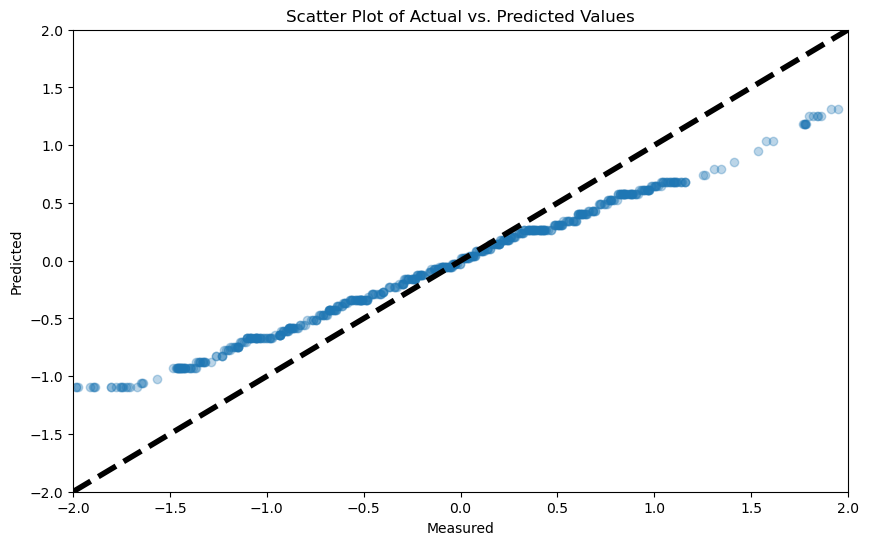

In [38]:
y_pred = gbt.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)  # alpha is set for better visualization

# Plot a line representing the perfect predictions
plt.plot([-2, 2], [-2, 2], 'k--', lw=4)

# Set the limits of x and y axis
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Label the axes and title the plot
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Actual vs. Predicted Values')

# Show the plot
plt.show()

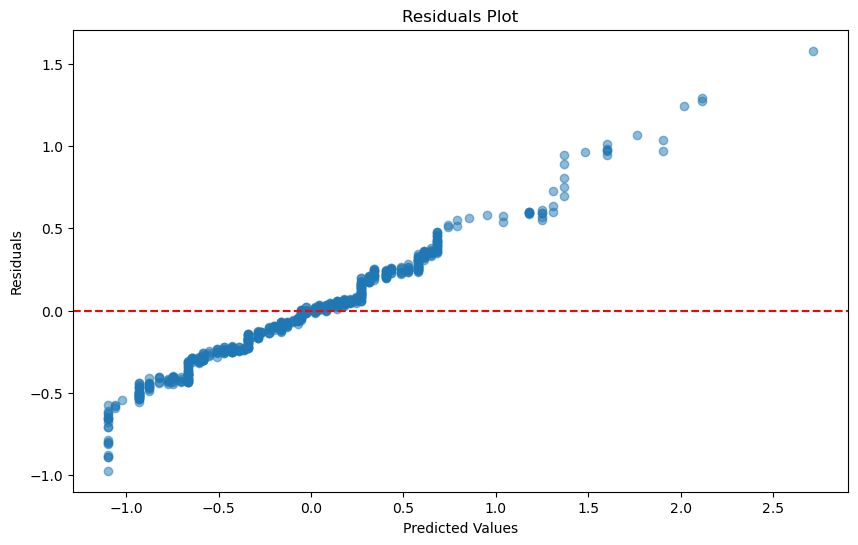

In [32]:
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)

# Plot a horizontal line at zero to show the point of no residual
plt.axhline(y=0, color='r', linestyle='--')

# Label the axes and title the plot
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Show the plot
plt.show()

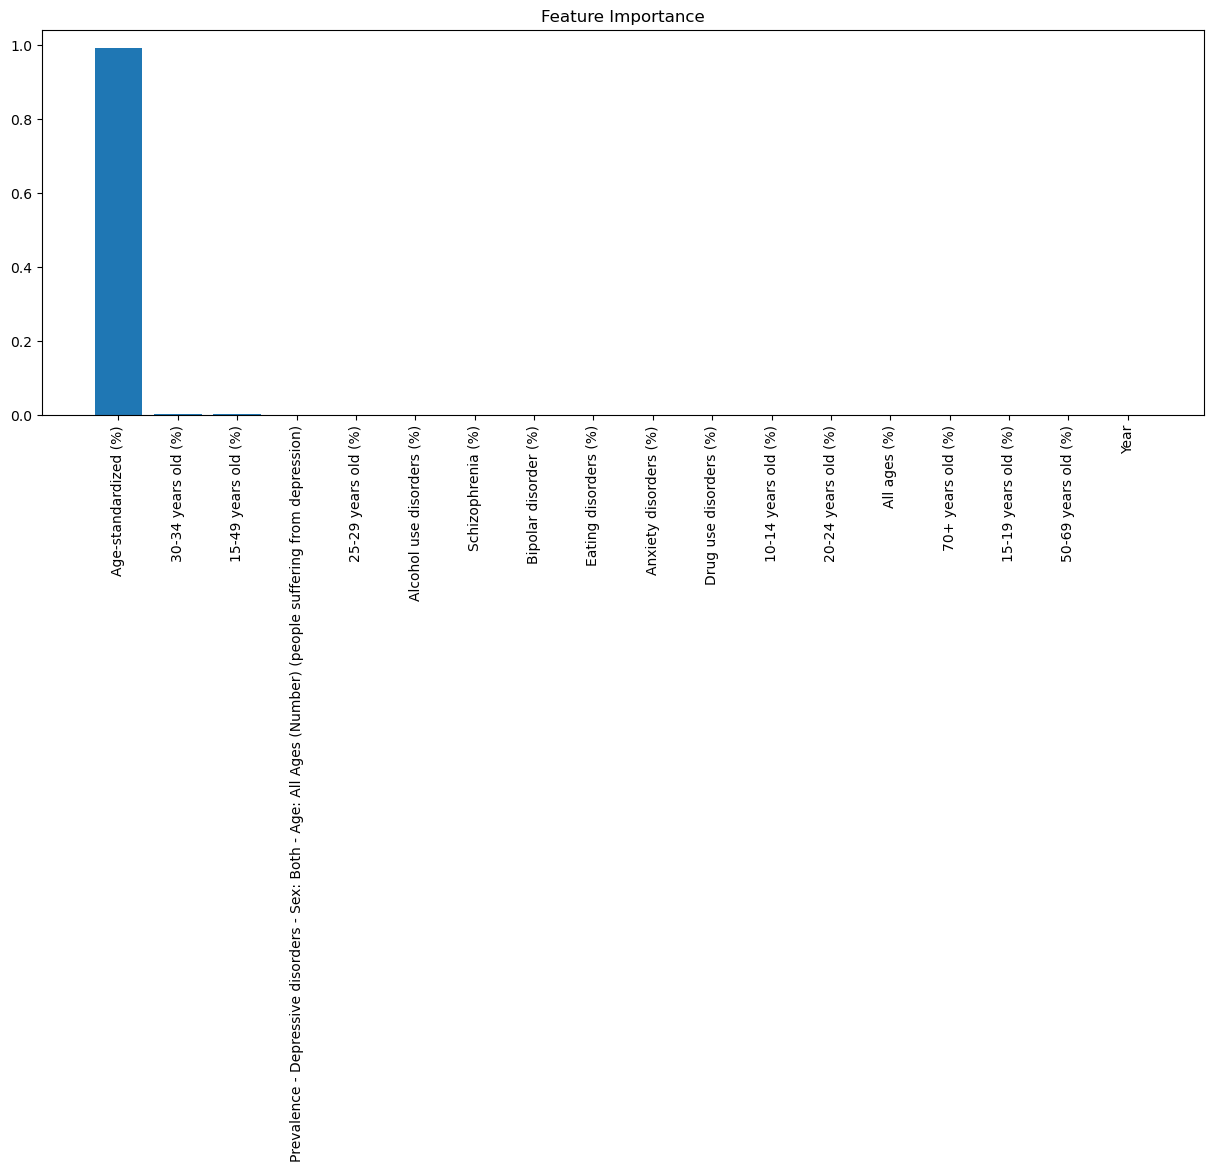

In [33]:
# Feature Importance
feature_importance = gbt.feature_importances_
indices = np.argsort(feature_importance)[::-1]
names = [X_train.columns[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

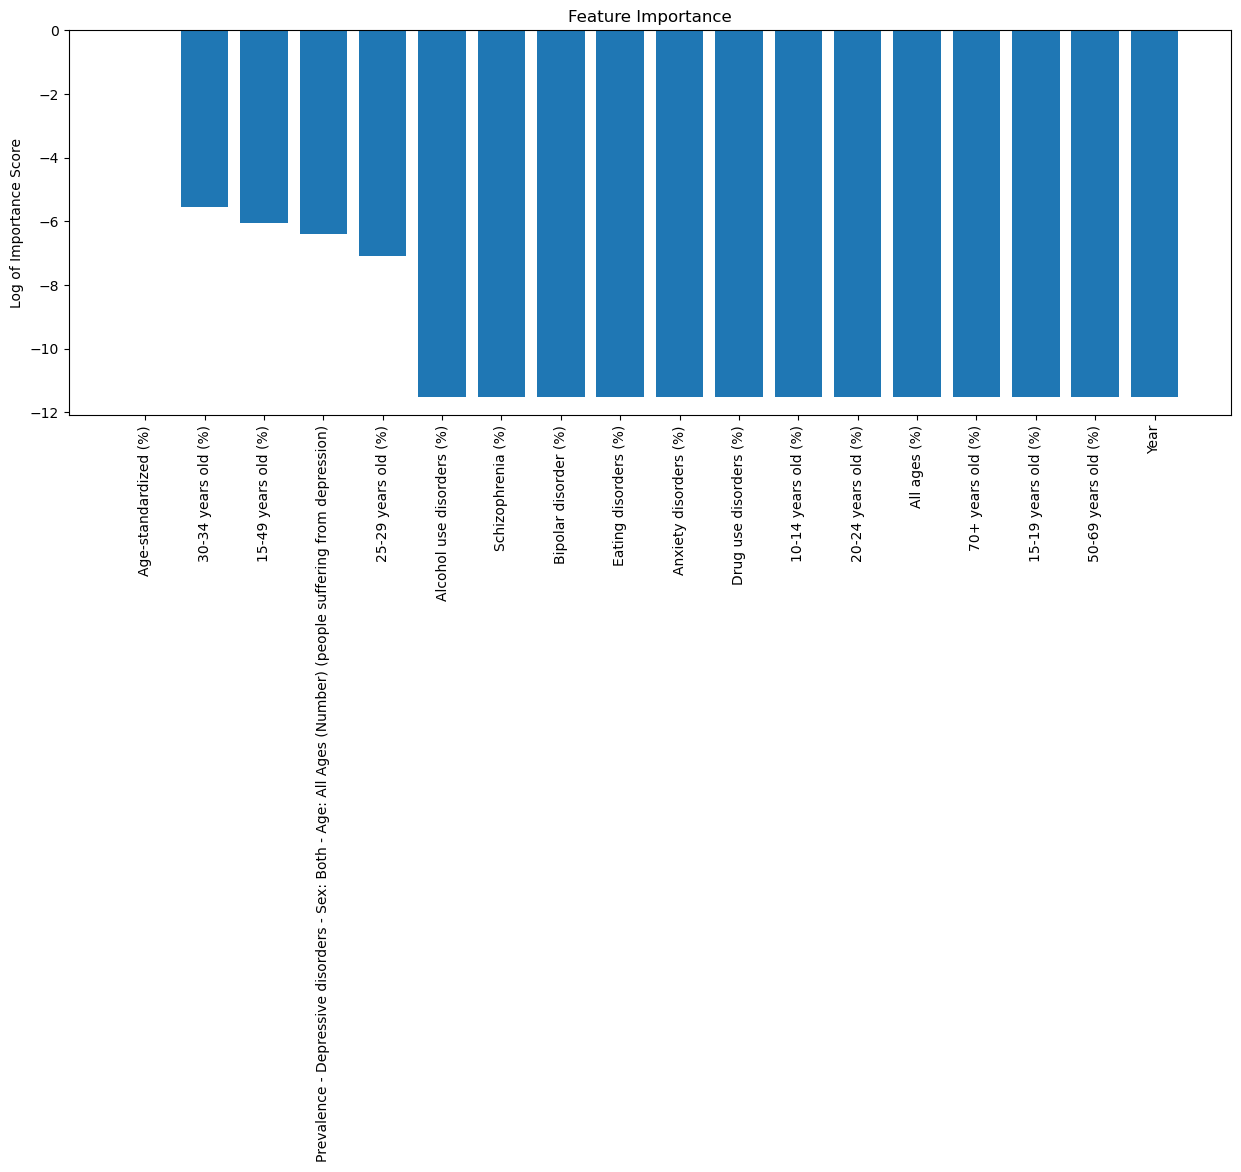

In [34]:
feature_importance = gbt.feature_importances_
indices = np.argsort(feature_importance)[::-1]
names = [X_train.columns[i] for i in indices]

# Adding a small constant to feature importance to avoid log(0)
adjusted_importance = feature_importance + 1e-5

# Plot the feature importances with a log scale
plt.figure(figsize=(15, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), np.log(adjusted_importance[indices]))
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.ylabel('Log of Importance Score')
plt.show()

In [ ]:
#Linear Regression

import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import metrics

file_path =  'C:/Users/eashw/Downloads/Mental_health_Depression_disorder_Data.xlsx'

data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

new_cols = [col for col in data.columns if col != 'Depression (%)'] + ['Depression (%)']
data = data[new_cols]
data = data.drop(columns=['Entity', 'Code'])
data.head()

X = pd.DataFrame(data.iloc[:, :-1]) #independent variable array
y = pd.DataFrame(data.iloc[:,-1]) #dependent variable vector

data.head()

In [10]:
X,y

(      Year  Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  \
 0     1990           0.160560              0.697779              0.101855   
 1     1991           0.160312              0.697961              0.099313   
 2     1992           0.160135              0.698107              0.096692   
 3     1993           0.160037              0.698257              0.094336   
 4     1994           0.160022              0.698469              0.092439   
 ...    ...                ...                   ...                   ...   
 6463  2013           0.155670              0.607993              0.117248   
 6464  2014           0.155993              0.608610              0.118073   
 6465  2015           0.156465              0.609363              0.119470   
 6466  2016           0.157111              0.610234              0.121456   
 6467  2017           0.157963              0.611242              0.124443   
 
       Anxiety disorders (%)  Drug use disorders (%)  \
 0    

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [14]:
coeff_df = pd.concat([w,v], axis=1, join='inner')
coeff_df

,Attribute,Co-efficient
0,Year,-4.567845e-16
1,Schizophrenia (%),-2.593369e-15
2,Bipolar disorder (%),-5.289016e-16
3,Eating disorders (%),5.237508e-16
4,Anxiety disorders (%),1.942331e-16
5,Drug use disorders (%),1.011540e-16
6,Alcohol use disorders (%),8.005882e-17
7,20-24 years old (%),-2.674922e-17
8,10-14 years old (%),-4.073933e-17
9,All ages (%),-2.708321e-16


In [15]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred

,Predicted
0,3.411459
1,3.707287
2,4.182413
3,3.372083
4,2.939887
...,...
1289,3.713259
1290,3.707962
1291,3.681522
1292,2.831825


In [16]:
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print ('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.140565616630619e-14
Mean Squared Error: 1.0522720013838918e-26
Root Mean Squared Error: 1.0258031006893535e-13


<Axes: xlabel='Depression (%)', ylabel='Predicted'>

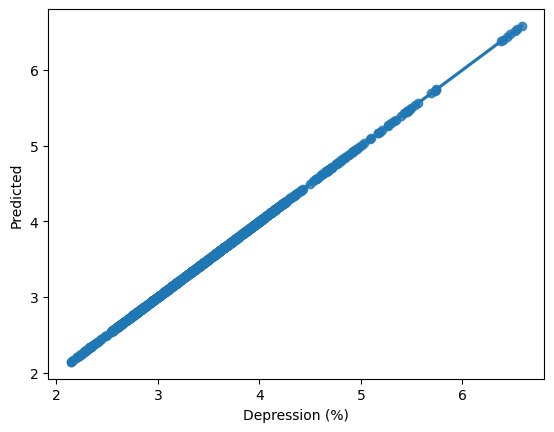

In [17]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(x=y_test, y=y_pred)

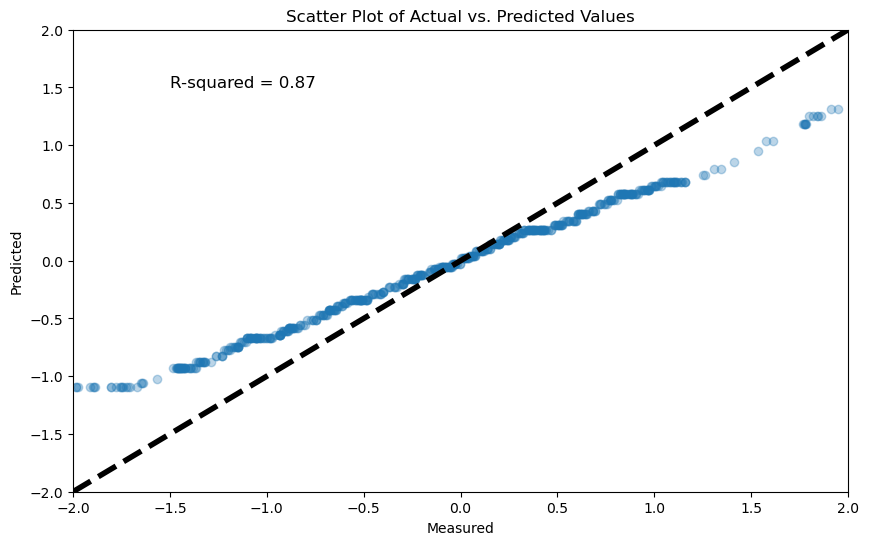

In [39]:
y_pred = gbt.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)  # alpha is set for better visualization

# Plot a line representing the perfect predictions
plt.plot([-2, 2], [-2, 2], 'k--', lw=4)

# Set the limits of x and y axis
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Label the axes and title the plot
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.text(-1.5, 1.5, f'R-squared = {r2:.2f}', fontsize=12)

# Show the plot
plt.show()